<a href="https://colab.research.google.com/github/Didier06/IA_licence_pro_chimie/blob/main/reseaux_neurones/IA_exo_make_moon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
## space for importing required libraries
from sklearn.datasets import make_classification, make_circles #libraries to generate data
from sklearn import datasets
import matplotlib.pyplot as plt # importing library to plot
import numpy as np #numpy library for data manipulation and plotting

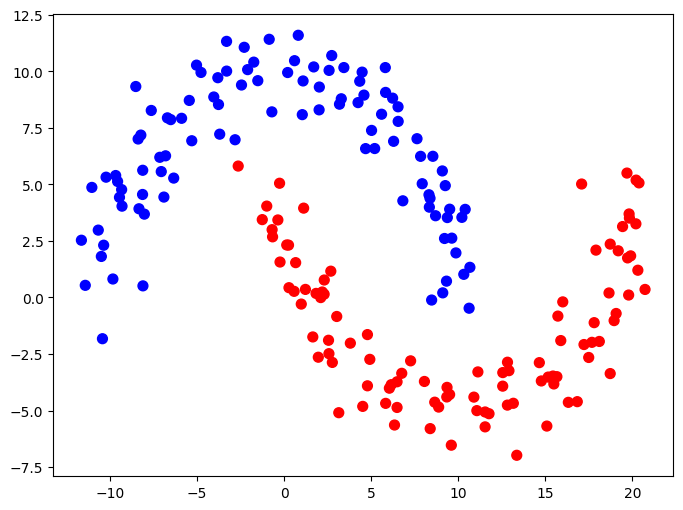

In [6]:
np.random.seed(0)
numPoints = 200
X, y = datasets.make_moons(numPoints, noise=0.10)

X = 10 * X

f, ax = plt.subplots(figsize=(8, 6)) #plotting data
ax.scatter(X[:,0],X[:,1], c=y, s=50,cmap="bwr")
plt.show()

# Création du réseau de neurones.
### Modifier le réseau ci-dessous pour le rendre plus performant

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5119 - loss: 0.6921  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.5688 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9016 - loss: 0.4394 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8711 - loss: 0.3959 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8259 - loss: 0.4213 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8885 - loss: 0.3301 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8982 - loss: 0.3001 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3536 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8540 - loss: 0.3615 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.3523 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8662 - loss: 0.3465 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

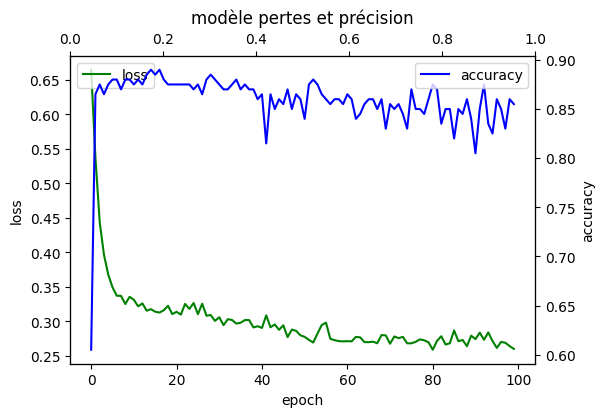

In [7]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import initializers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
import numpy as np

#my_init = initializers.Zeros()
my_init = initializers.Ones()
# Modifiez ici vos réseaux de neuronespour améliorer sa performance et donc séparer les 2 classes correctement.
model=Sequential()
#pour La couche d'entrée, input_shape vaut : 2  (car on a 2 features: x et y), pas de normalisation nécessaire
model.add(Dense(units=2,input_shape=[2],activation= 'sigmoid',kernel_initializer = my_init))
#Couches intermédiaires

#La couche de sortie, units vaut 2 mais activation softmax
model.add(Dense(units=2, activation='softmax'))

#Optimiseur SGD ou adam ("adam "alternatif à "sgd")
#opt = SGD(learning_rate=0.01) #w = w - learning_rate * grad
opt = Adam(learning_rate=0.1)
model.compile(loss='binary_crossentropy',optimizer=opt,  metrics=['accuracy'])
# entrée de dimension 2 (x, y)
entree = X
# y_true de dimension  2 (2 classes)
sortie = to_categorical(y) #Converts a class vector (integers) to binary class matrix.
# 0 >  0 1
# 1 >  1 0     vecteur (y_true) > matrice binaire (sortie)

#Entraînement du réseau 100 passages
history = model.fit(x=entree,y=sortie,epochs=100, batch_size=20)
print(f"précision obtenue : {history.history['accuracy'][-1]:.3f}")
model.predict(np.array([[0, 5],[1,9]]))

# performance du réseau
# Représentation d'un nuage de points

fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twiny()

plt.title('modèle pertes et précision')
ax1.plot(history.history['loss'], 'g-', label = 'loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()

ax2.plot(history.history['accuracy'], 'b-', label ='accuracy')
ax2.set_ylabel('accuracy')
ax2.legend(loc='upper right')
plt.show()

# Tracé des zones de prédiction

1954/1954 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step


(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Domaines de décision ...'}>)

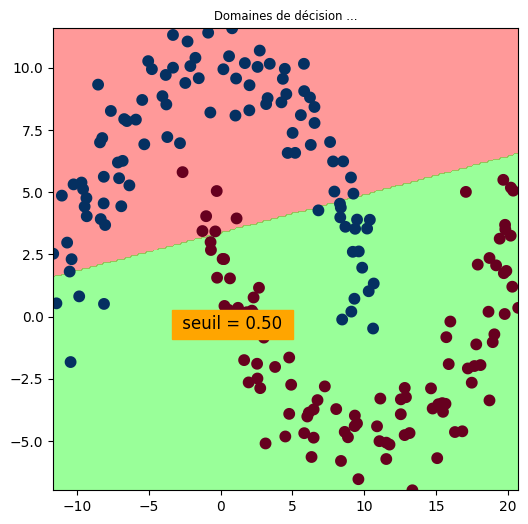

In [8]:
import matplotlib as mpl
def plot_decision_boundary2(X, y, NbClasses, model, steps=250,alpha=0.4,seuil=0.51):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    #alpha = alpha
    colorT = (0, 0, 0.0,0.0)# tranparent
    color2 = [(1, 0, 0,alpha),(0, 1, 0,alpha)]
    def C_map(coul):
        cmap = (mpl.colors.ListedColormap([colorT, coul]))
        return cmap

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min(), X[:,0].max()
    ymin, ymax = X[:,1].min(), X[:,1].max()
    steps = steps
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    fig = plt.figure(figsize=(6, 6))
    ax =plt.subplot(111)
    #fig, ax = plt.subplots()

    for i in range(0,NbClasses):
        #labels1= labels[:,i]
        #print(labels1)
        # Plot decision boundary in region of interest
        z = labels[:,i].reshape(xx.shape)
        z = z > seuil #(seuil Threshold value)
        ax.contourf(xx, yy, z, cmap=C_map(color2[i]))
    plt.text(-3, -0.5, f" seuil = {seuil:.2f} ", fontsize = 12, backgroundcolor ='orange', ha ='left', c ='black')
    plt.title("Domaines de décision ...", fontsize="small")
    #print(y)
    ax.scatter(X[:,0], X[:,1], c= y,lw=5,marker=".", s=50,cmap="RdBu")

    return fig, ax

plot_decision_boundary2(entree, sortie[:,0], 2, model, alpha=0.4, seuil=0.5)
#plot_decision_boundary2(entree, y, 2, model, alpha=0.2,seuil = 0.6)
#plot_decision_boundary2(entree, y, 2, model, alpha=0.2,seuil = 0.9)